In [1]:
#linear regression

In [2]:
from sklearn.datasets import load_boston
bostonDS = load_boston()
bostonDS.data.shape

(506, 13)

In [3]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [4]:
bostonDS.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
boston = pd.DataFrame(bostonDS.data, columns=bostonDS.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
boston['MEDV'] = bostonDS.target

In [7]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

D:\as c\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


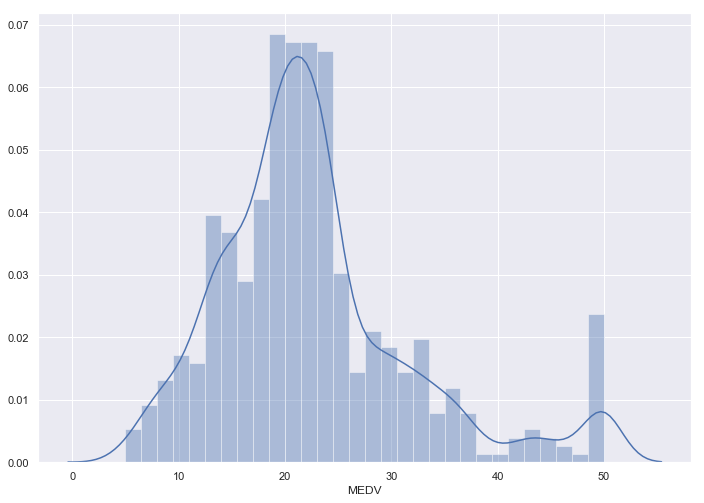

<Figure size 842.4x595.44 with 0 Axes>

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()
plt.savefig('LR_graph.png')

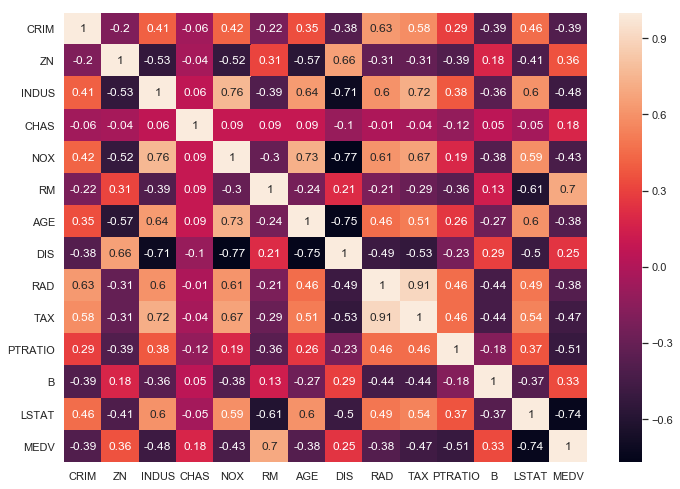

In [9]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
plt.savefig('LR_heat.jpg')

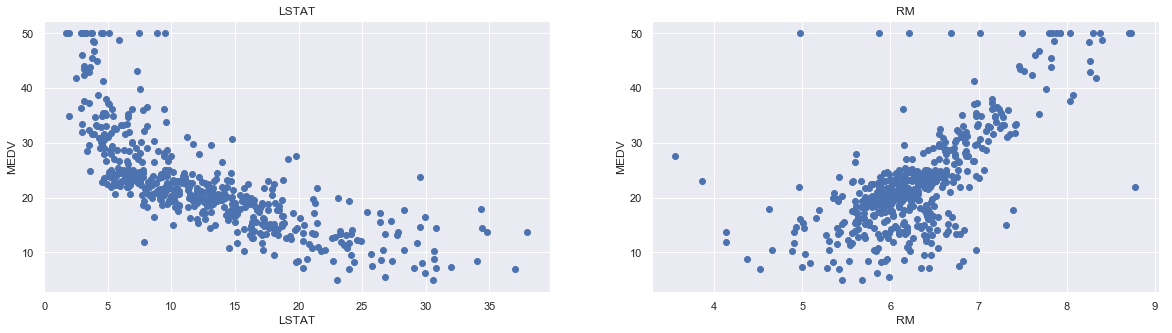

In [10]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')
    plt.savefig('LR_pic.jpg')

In [11]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
from sklearn import metrics
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = metrics.r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = metrics.r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.682607345845019
R2 score is 0.618161707970275


The model performance for testing set
--------------------------------------
RMSE is 4.861432596429274
R2 score is 0.7175039832076544


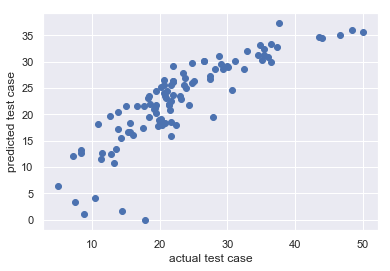

In [15]:
%matplotlib inline
plt.scatter(Y_test,y_test_predict)
plt.xlabel('actual test case')
plt.ylabel('predicted test case')
plt.savefig('LR_score.jpg')

In [200]:
#svm

In [256]:
from sklearn import datasets		# To Get iris dataset
from sklearn import svm    			# To fit the svm classifier
import numpy as np

In [257]:
boston_dataset = datasets.load_boston()

In [258]:
print ("Boston target :: ", boston_dataset['target'])

Boston target ::  [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.

In [259]:
from sklearn import svm

In [260]:
clf=svm.LinearSVR(random_state=5)
import warnings
warnings.filterwarnings('ignore')

In [261]:
clf.fit(boston_dataset.data,boston_dataset.target)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=5, tol=0.0001, verbose=0)

In [262]:
preds=clf.predict(boston_dataset.data)

In [263]:
import pandas as pd

In [264]:
df = pd.DataFrame(boston_dataset.data)
df['target'] = boston_dataset.target
df['preds'] = preds

print(df)

            0     1      2    3      4      5      6       7     8      9  \
0     0.00632  18.0   2.31  0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07  0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07  0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18  0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18  0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18  0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87  0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87  0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87  0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87  0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87  0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87  0.0  0.524  6.009   82.9  6.2267   5.0  311.0   

In [265]:
from sklearn import model_selection
X = boston_dataset.data
Y = boston_dataset.target
validation_size = 0.30
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [266]:
clf.fit(X_train,Y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=5, tol=0.0001, verbose=0)

In [267]:
clf.fit(X_validation,Y_validation)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=5, tol=0.0001, verbose=0)

In [268]:
preds = clf.predict(X_validation)
df = pd.DataFrame(X_validation)
df['target'] = Y_validation
df['preds'] = preds

print(df)

            0      1      2    3       4      5      6       7     8      9  \
0     3.84970    0.0  18.10  1.0  0.7700  6.395   91.0  2.5052  24.0  666.0   
1     0.03041    0.0   5.19  0.0  0.5150  5.895   59.6  5.6150   5.0  224.0   
2     0.24103    0.0   7.38  0.0  0.4930  6.083   43.7  5.4159   5.0  287.0   
3     0.62976    0.0   8.14  0.0  0.5380  5.949   61.8  4.7075   4.0  307.0   
4    73.53410    0.0  18.10  0.0  0.6790  5.957  100.0  1.8026  24.0  666.0   
5    24.80170    0.0  18.10  0.0  0.6930  5.349   96.0  1.7028  24.0  666.0   
6    14.33370    0.0  18.10  0.0  0.6140  6.229   88.0  1.9512  24.0  666.0   
7     0.09178    0.0   4.05  0.0  0.5100  6.416   84.1  2.6463   5.0  296.0   
8     0.03584   80.0   3.37  0.0  0.3980  6.290   17.8  6.6115   4.0  337.0   
9     3.77498    0.0  18.10  0.0  0.6550  5.952   84.7  2.8715  24.0  666.0   
10   14.33370    0.0  18.10  0.0  0.7000  4.880  100.0  1.5895  24.0  666.0   
11    0.41238    0.0   6.20  0.0  0.5040  7.163   79

In [269]:
import pandas as pd

In [270]:
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
corr=df.corr()

In [271]:
import warnings
warnings.filterwarnings('ignore')

In [272]:
import seaborn as sns

In [273]:
from sklearn.metrics import mean_squared_error,r2_score
rmse = mean_squared_error(Y_validation, preds)
r2 = r2_score(Y_validation, preds)

# printing values
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Root mean squared error:  37.428902670317456
R2 score:  0.4928333417669697


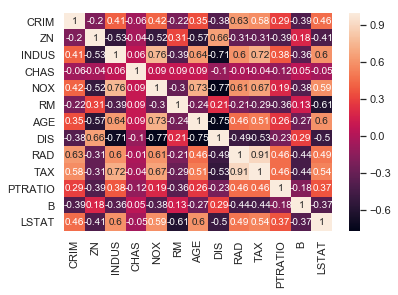

In [274]:
boston = pd.DataFrame(boston_dataset.data, columns=boston.feature_names)
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
plt.savefig('SVM_heat.jpg')

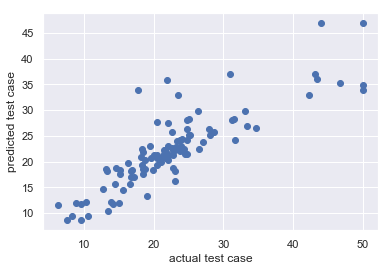

In [230]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(Y_validation,preds)
plt.xlabel('actual test case')
plt.ylabel('predicted test case')
plt.savefig('SVM_score.jpg')

In [36]:
#knn

In [233]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [234]:
import numpy as np

In [235]:
boston = datasets.load_boston()

In [236]:
x=boston.data #caps. on represent a matrix
y=boston.target #caps off represent a vector

In [237]:
from sklearn.neighbors import KNeighborsRegressor

In [238]:
knn=KNeighborsRegressor(n_neighbors=2)# instantiation of the estimator

In [239]:
print(knn)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')


In [240]:
knn.fit(x,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [241]:
y_pred=knn.predict(x)

In [242]:
import pandas as pd

In [243]:
df = pd.DataFrame(boston.data)
df['target'] = boston.target
df['preds'] = y_pred

print(df)

            0     1      2    3      4      5      6       7     8      9  \
0     0.00632  18.0   2.31  0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07  0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07  0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18  0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18  0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18  0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87  0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87  0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87  0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87  0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87  0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87  0.0  0.524  6.009   82.9  6.2267   5.0  311.0   

In [244]:
from sklearn import model_selection
X = boston.data
Y = boston.target
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [245]:
knn.fit(X_train,Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [246]:
knn.fit(X_validation,Y_validation)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [247]:
preds = knn.predict(X_validation)

In [248]:
df = pd.DataFrame(X_validation)
df['target'] = Y_validation
df['preds'] = preds

print(df)

            0     1      2    3      4      5      6        7     8      9  \
0     3.84970   0.0  18.10  1.0  0.770  6.395   91.0   2.5052  24.0  666.0   
1     0.03041   0.0   5.19  0.0  0.515  5.895   59.6   5.6150   5.0  224.0   
2     0.24103   0.0   7.38  0.0  0.493  6.083   43.7   5.4159   5.0  287.0   
3     0.62976   0.0   8.14  0.0  0.538  5.949   61.8   4.7075   4.0  307.0   
4    73.53410   0.0  18.10  0.0  0.679  5.957  100.0   1.8026  24.0  666.0   
5    24.80170   0.0  18.10  0.0  0.693  5.349   96.0   1.7028  24.0  666.0   
6    14.33370   0.0  18.10  0.0  0.614  6.229   88.0   1.9512  24.0  666.0   
7     0.09178   0.0   4.05  0.0  0.510  6.416   84.1   2.6463   5.0  296.0   
8     0.03584  80.0   3.37  0.0  0.398  6.290   17.8   6.6115   4.0  337.0   
9     3.77498   0.0  18.10  0.0  0.655  5.952   84.7   2.8715  24.0  666.0   
10   14.33370   0.0  18.10  0.0  0.700  4.880  100.0   1.5895  24.0  666.0   
11    0.41238   0.0   6.20  0.0  0.504  7.163   79.9   3.2157   

In [249]:
import pandas as pd

In [250]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
corr=df.corr()

In [251]:
import warnings
warnings.filterwarnings('ignore')

In [252]:
import seaborn as sns # just a conventional alias, don't know why

In [253]:
from sklearn.metrics import mean_squared_error,r2_score
rmse = mean_squared_error(Y_validation, preds)
r2 = r2_score(Y_validation, preds)

# printing values
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Root mean squared error:  21.27901960784314
R2 score:  0.7366661990847646


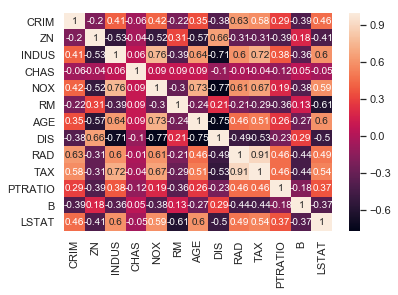

In [254]:
boston_dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
correlation_matrix = boston_dataset.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
plt.savefig('KNN_heat.jpg')

In [192]:
print(Y_validation)

[21.7 18.5 22.2 20.4  8.8  8.3 21.4 23.6 23.5 19.  10.2 31.6 18.4 19.4
 44.  23.2 22.  33.1 13.2 21.7 16.7 23.9 42.3 18.5 14.6  7.5 33.4 22.
 28.1 24.8 19.9 24.8 28.7 14.1 43.5 20.4 18.3 13.4 21.  22.  22.6 13.9
 13.3 26.5 20.   9.5 21.6 22.6 15.6 23.1 27.1 25.2 15.  21.9  9.6 22.7
 18.3 21.4 20.5 21.1 24.5 31.  18.7 18.7 22.7 50.  16.7 23.  20.4 22.8
 24.8 10.5 18.2 31.5 23.8 19.6 12.7 15.2 31.2 14.5 17.8 25.  23.  50.
 23.7 25.1 24.7 16.8 34.7 23.3 50.  46.7 43.1 24.4 24.1  6.3 26.4 16.3
 17.2 28.  15.2 16.6]


In [193]:
print(preds)

[20.65 18.6  21.3  20.7  11.9   9.4  21.55 22.6  32.9  13.25 12.05 24.1
 17.55 22.95 47.   22.9  27.55 29.75 18.5  21.95 18.15 22.95 32.9  21.8
 18.65  8.55 26.95 22.95 25.15 24.25 18.35 28.   25.65 11.8  36.1  19.35
 22.4  10.45 20.7  20.35 25.65 12.05 18.15 22.4  21.35 11.8  22.2  22.65
 14.4  16.3  23.75 25.1  11.9  35.95  8.55 21.35 19.35 22.2  27.6  19.9
 21.4  37.05 20.35 18.6  18.65 47.   16.95 18.15 21.3  22.2  26.4   9.4
 20.85 28.3  22.1  20.65 14.65 18.4  28.   15.55 33.9  25.1  22.2  34.95
 24.25 28.3  21.45 18.35 26.6  24.05 33.9  35.2  37.05 22.4  24.3  11.55
 29.75 19.7  16.95 26.4  17.55 15.55]


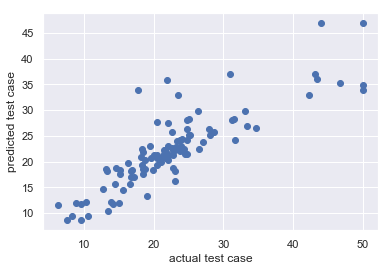

In [231]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(Y_validation,preds)
plt.xlabel('actual test case')
plt.ylabel('predicted test case')
plt.savefig('KNN_score.jpg')

In [1]:
#RIDGE REGRESSION

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
#print boston_df.info()
# add another column that contains the house prices which in scikit learn datasets are considered as target
boston_df['Price']=boston.target
#print boston_df.head(3)
newX=boston_df.drop('Price',axis=1)
print (newX[0:3]) # check 
newY=boston_df['Price']
#print type(newY)# pandas core frame
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)
print (len(X_test), len(y_test))
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100) 
print ("ridge regression test score high alpha:", Ridge_test_score100) 

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
152 152
ridge regression train score low alpha: 0.7419030253527293
ridge regression test score low alpha: 0.7146125373123909
ridge regression train score high alpha: 0.7172809669938278
ridge regression test score high alpha: 0.6805765856921933


In [4]:
preds=rr100.predict(X_test)

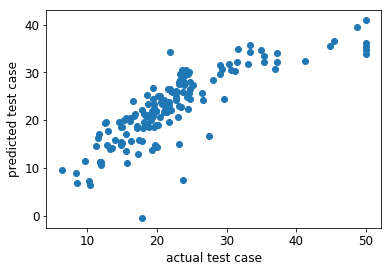

In [5]:

plt.scatter(y_test,preds)
plt.xlabel('actual test case')
plt.ylabel('predicted test case')
plt.savefig('RR_score.jpg')

In [6]:
from sklearn.metrics import mean_squared_error,r2_score
rmse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)

# printing values
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Root mean squared error:  25.122799744233912
R2 score:  0.6805765856921933


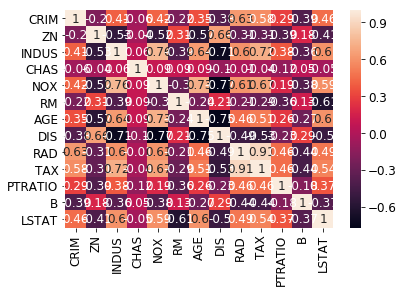

In [7]:
import pandas as pd
boston_dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
correlation_matrix = boston_dataset.corr().round(2)
# annot = True to print the values inside the square
import seaborn as sns
sns.heatmap(data=correlation_matrix, annot=True)
plt.savefig('RR_heat.jpg')

In [1]:
#decision tree

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
X, y = boston.data, boston.target
features = boston.feature_names
import numpy as np

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
crossvalidation = KFold(n_splits=5,
 shuffle=True, random_state=1)

In [4]:
from sklearn import tree
for depth in range(1,10):
 tree_regressor = tree.DecisionTreeRegressor(
  max_depth=depth, random_state=0)
 if tree_regressor.fit(X,y).tree_.max_depth < depth:
     break
 score = np.mean(cross_val_score(tree_regressor, X, y, cv=crossvalidation, n_jobs=1))
print('Depth:',depth)
print('Accuracy:',score)

Depth: 9
Accuracy: 0.6849381709549437


In [5]:
tree_regressor = tree.DecisionTreeRegressor(
 min_samples_split=30, min_samples_leaf=10,
  random_state=0)
tree_regressor.fit(X,y)
score = np.mean(cross_val_score(tree_regressor, X, y, cv=crossvalidation, n_jobs=1))
print('Accuracy:',score)

Accuracy: 0.7294865045656411


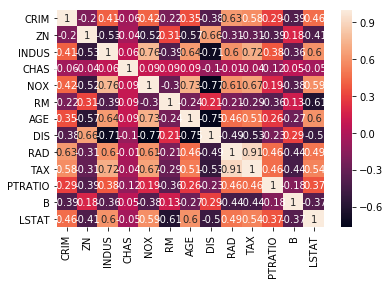

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
boston_dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
correlation_matrix = boston_dataset.corr().round(2)
# annot = True to print the values inside the square
import seaborn as sns
sns.heatmap(data=correlation_matrix, annot=True)
plt.savefig('TREE_heat.jpg')

In [21]:
from sklearn import model_selection
X = boston.data
Y = boston.target
validation_size = 0.30
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [22]:
tree_regressor=tree.DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10,
  random_state=0)
tree_regressor.fit(X_train,Y_train)
tree_regressor.fit(X_validation,Y_validation)
preds = tree_regressor.predict(X_validation)
df = pd.DataFrame(boston.data, columns=boston.feature_names)
corr=df.corr()
from sklearn.metrics import mean_squared_error,r2_score
rmse = mean_squared_error(Y_validation, preds)
r2 = r2_score(Y_validation, preds)

# printing values
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Root mean squared error:  15.117424854750515
R2 score:  0.7951568628071739


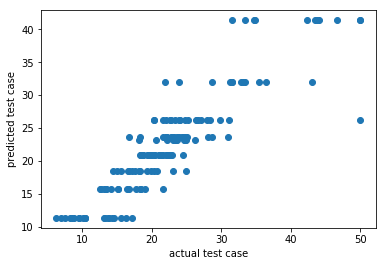

In [24]:
plt.scatter(Y_validation,preds)
plt.xlabel('actual test case')
plt.ylabel('predicted test case')
plt.savefig('DT_score.jpg')

In [16]:
#artificial_neural_network

In [17]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'